In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. How many rows and columns are in gdp_df? What are the data types of each column?

Answer: 7762 rows, data types = object, int64, float64, float64.

In [5]:
gdp_df.shape #Answer: 7662 rows

(7662, 4)

In [6]:
gdp_df.info() #Answer: Data Types listed below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


Answers: 7662 rows & 4 columns - data types above 

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})

In [8]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [9]:
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

Answer: 202 Countries have data for all 33 years, 40 countries are missing data, and the number of observations increase over the years then drop off after 2020.

In [10]:
unique_years = gdp_df["Year"].unique() #find unique years
print(unique_years)
print(len(unique_years))

count_years = gdp_df.groupby("Country").size().reset_index(name="Count") #groups
print(count_years) #count years by country

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2022 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990]
33
                         Country  Count
0                    Afghanistan     20
1    Africa Eastern and Southern     33
2     Africa Western and Central     33
3                        Albania     33
4                        Algeria     33
..                           ...    ...
237                     Viet Nam     33
238           West Bank and Gaza     29
239                        World     33
240                       Zambia     33
241                     Zimbabwe     33

[242 rows x 2 columns]


In [11]:
equal_33 = count_years[count_years.Count == 33] #count countries with all years/complete data
print(len(equal_33)) #202 countries with all years recorded

202


In [12]:
not_33 = count_years[count_years.Count != 33] #count countries that do not have all years
count_not = len(not_33["Count"])
print(count_not) # 40 countries that do not have exactly 33 countries

40


In [13]:
not_33_sorted = not_33.sort_values("Count") 
print(not_33_sorted)

                       Country  Count
53                    Djibouti     10
197                    Somalia     10
225   Turks and Caicos Islands     12
192  Sint Maarten (Dutch part)     14
112                     Kosovo     15
36              Cayman Islands     16
154                      Nauru     19
0                  Afghanistan     20
47                    CuraÃ§ao     22
213    SÃ£o TomÃ© and Principe     22
169                      Palau     22
166         Other small states     23
180                      Qatar     23
219                Timor-Leste     23
124                    Liberia     23
125                      Libya     24
185                 San Marino     25
149                 Montenegro     26
195               Small states     26
194                   Slovenia     28
188                     Serbia     28
126                  Lithuania     28
135                   Maldives     28
120                     Latvia     28
46                     Croatia     28
103         

Text(0.5, 1.0, 'GDP Observations per Year')

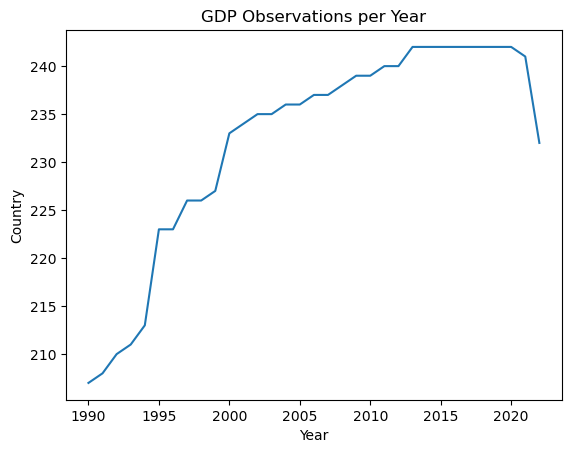

In [14]:
gdp_observations = gdp_df.groupby("Year")["Country"].count() #work for observations part of question

sns.lineplot(data=gdp_observations)
plt.title("GDP Observations per Year")

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Answer: Histograms and density plots show distributions, while the violin plot and the box plot show summary and shape of the distributions.

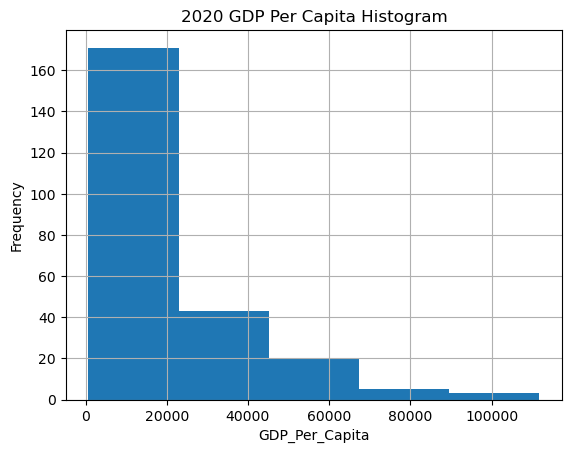

In [15]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020] #subset year to 2020

gdp_2020["GDP_Per_Capita"].hist(bins=5)

plt.title("2020 GDP Per Capita Histogram")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, '2020 GDP Per Capita Density Chart')

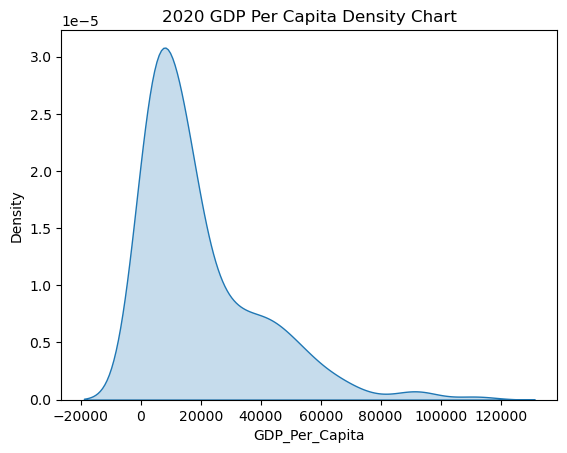

In [16]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title("2020 GDP Per Capita Density Chart")

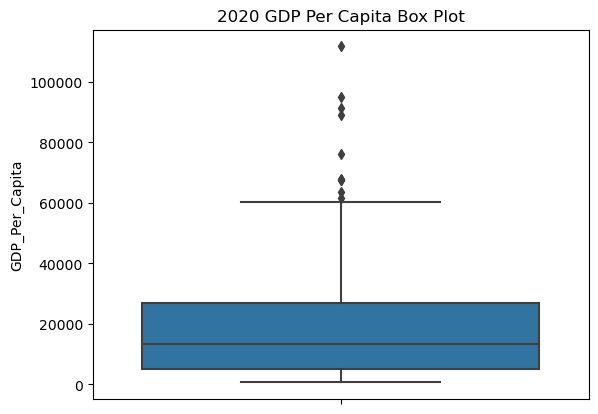

In [17]:
sns.boxplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Box Plot")
plt.show()

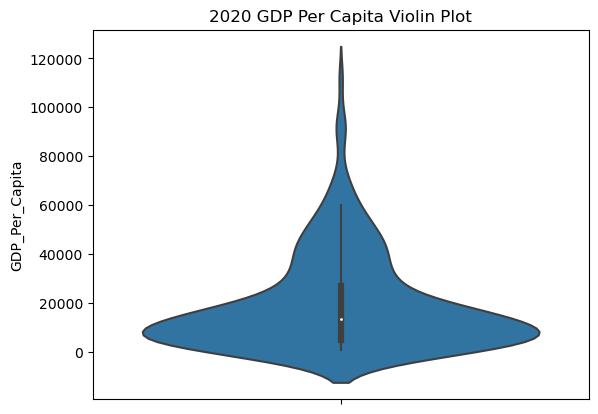

In [18]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.title("2020 GDP Per Capita Violin Plot")
plt.show()

9. What was the median GDP per capita value in 2020?

Answer: 13357.997573370474

In [19]:
print(gdp_2020["GDP_Per_Capita"].median())

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [20]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])] #subset for specified years
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
1                   Afghanistan  2020     1968.341002
11                  Afghanistan  2010     2026.163818
22  Africa Eastern and Southern  2020     3455.023119
32  Africa Eastern and Southern  2010     3513.315920
42  Africa Eastern and Southern  2000     2897.140841


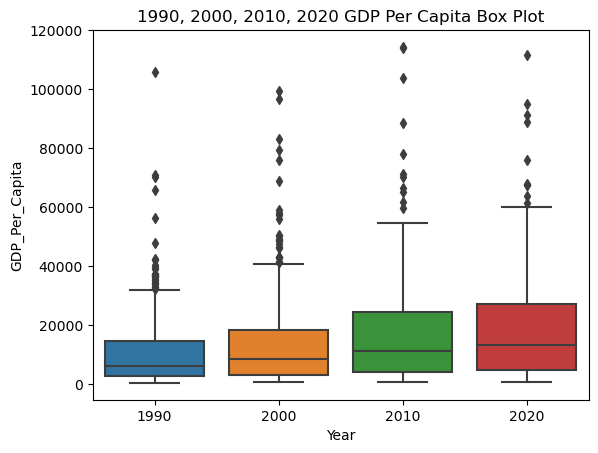

In [21]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Box Plot")
plt.show()

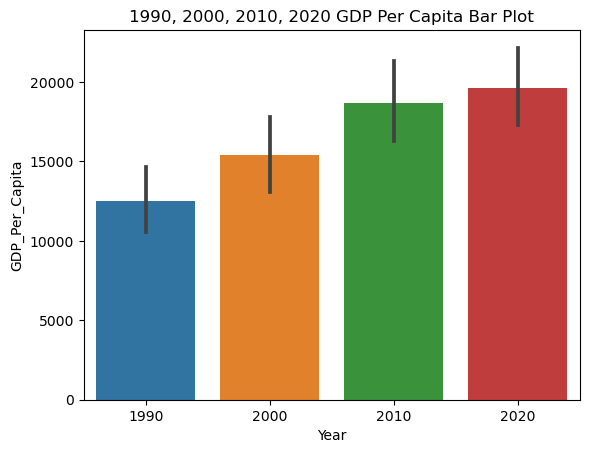

In [22]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Bar Plot")
plt.show()

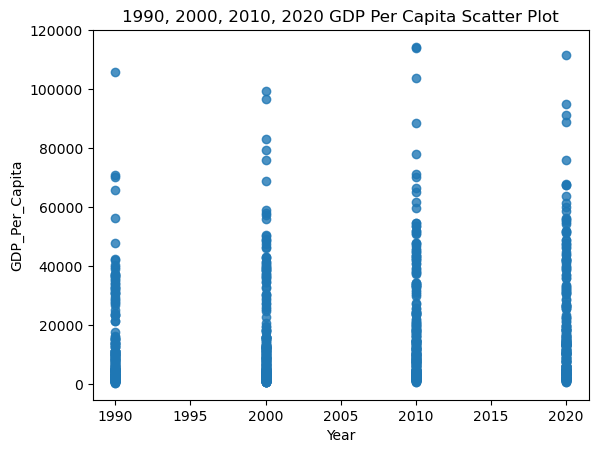

In [23]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Scatter Plot")
plt.show()

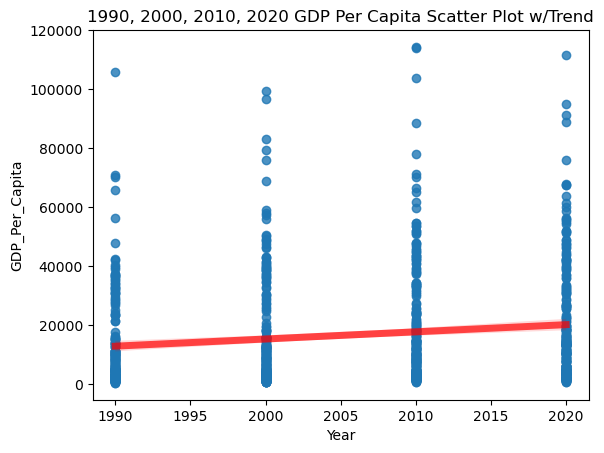

In [24]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("1990, 2000, 2010, 2020 GDP Per Capita Scatter Plot w/Trend")
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

Answer: United Arab Emirates

In [25]:
over_10k = gdp_df[gdp_df["GDP_Per_Capita"]>=100000].sort_values("Year")
print(over_10k)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059
7301  United Arab Emirates  1991   101048.696239
7295  United Arab Emirates  1997   100956.706467
4167            Luxembourg  2001   101143.147977
4166            Luxembourg  2002   103317.331098
4165            Luxembourg  2003   104743.000088
4164            Luxembourg  2004   107634.837198
4163            Luxembourg  2005   108632.360016
4162            Luxembourg  2006   113346.035782
4161            Luxembourg  2007   120647.822959
4160            Luxembourg  2008   118154.667184
4159            Luxembourg  2009   112230.081410
5756                 Qatar  2010   103902.519310
4158            Luxembourg  2010   114343.988089
4191      Macao SAR, China  2010   114042.495308
4190      Macao SAR, China  2011   135365.387353
5755                 Qatar  2011   111879.747777
4157            Luxembourg  2011   112998.390477
4189      Macao SAR, China  2012   144891.341893
5754                

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Answer: Luxembourg

In [26]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita", ascending=False) #sort by descending 
print(gdp_2020) #Luxembourg 

                       Country  Year  GDP_Per_Capita
4148                Luxembourg  2020   111751.314751
6108                 Singapore  2020    94910.101431
3279                   Ireland  2020    91356.855054
5746                     Qatar  2020    89019.069857
681                    Bermuda  2020    76117.804744
...                        ...   ...             ...
5074                     Niger  2020     1214.546556
6273                   Somalia  2020     1127.418534
1630           Dem. Rep. Congo  2020     1044.071214
1217  Central African Republic  2020      847.765012
973                    Burundi  2020      711.355263

[242 rows x 3 columns]


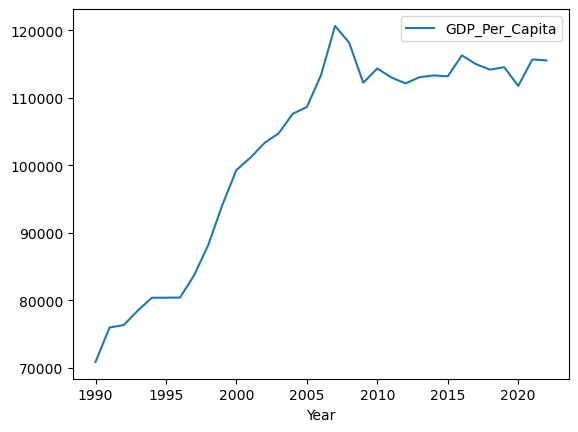

In [27]:
gdp_lux = gdp_df[gdp_df["Country"] == "Luxembourg"]
gdp_lux.plot(x="Year", y="GDP_Per_Capita")
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

Answer: Burundi

                       Country  Year  GDP_Per_Capita
973                    Burundi  2020      711.355263
1217  Central African Republic  2020      847.765012
1630           Dem. Rep. Congo  2020     1044.071214
6273                   Somalia  2020     1127.418534
5074                     Niger  2020     1214.546556
...                        ...   ...             ...
681                    Bermuda  2020    76117.804744
5746                     Qatar  2020    89019.069857
3279                   Ireland  2020    91356.855054
6108                 Singapore  2020    94910.101431
4148                Luxembourg  2020   111751.314751

[242 rows x 3 columns]


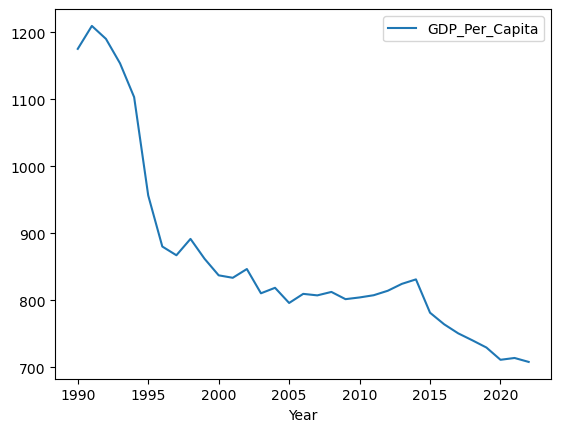

In [28]:
gdp_2020 = gdp_2020.sort_values("GDP_Per_Capita") #sort ascending
print(gdp_2020) #burundi

gdp_bur = gdp_df[gdp_df["Country"] == "Burundi"]
gdp_bur.plot(x="Year", y="GDP_Per_Capita")
plt.show()

**Bonus question:** 
Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
Which countries had lower GDP per capita in 2020 than in 1990?

Answer: No, the gdp was 12506 in 1990 vs 19586 in 2020.

In [29]:
#Part 1 answer
gdp_1990 = gdp_df[gdp_df["Year"]==1990]
mean_1990 = gdp_1990["GDP_Per_Capita"].mean()
mean_2020 = gdp_2020["GDP_Per_Capita"].mean()
print(mean_1990)
print(mean_2020)
print(mean_1990 > mean_2020) # calculate the average of each year 

12506.08837386169
19586.754445561965
False


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [30]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495) #missing values after row 4495
print(internet_df.head())
print(internet_df.tail())
print(internet_df.info()) 

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [31]:
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"})
internet_df = internet_df.drop("Value Footnotes", axis=1)
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


16. Look at the number of observations in this dataset per year. What do you notice?

Observations begin in 1960 and drastically increase after 1989. However, observations are inconsistent (e.g. 1990 has 2010 observations then drops down to 39)

Text(0.5, 1.0, 'Observations per Year')

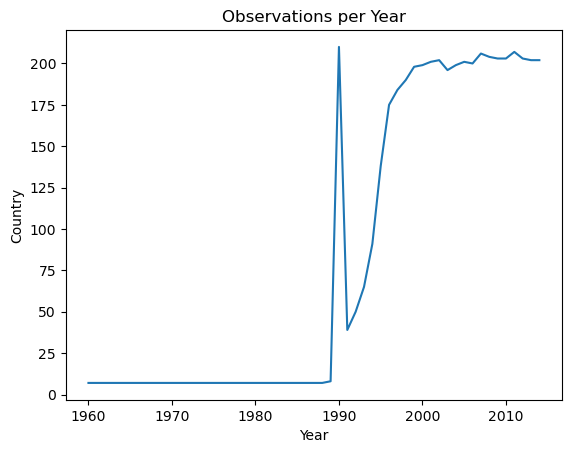

In [32]:
observations = internet_df.groupby("Year")["Country"].count()

sns.lineplot(data=observations)
plt.title("Observations per Year")


17. What is the first year to have a non-zero internet users percentage value?

Answer: 1990

In [33]:
non_zero = internet_df.groupby("Year")["Internet_Users_Pct"].sum()
print(non_zero)

Year
1960       0.000000
1965       0.000000
1970       0.000000
1975       0.000000
1976       0.000000
1977       0.000000
1978       0.000000
1979       0.000000
1980       0.000000
1981       0.000000
1982       0.000000
1983       0.000000
1984       0.000000
1985       0.000000
1986       0.000000
1987       0.000000
1988       0.000000
1989       0.000000
1990       5.032933
1991      10.931876
1992      19.951850
1993      30.144702
1994      60.571026
1995     131.726726
1996     253.150223
1997     454.897179
1998     750.253424
1999    1172.587525
2000    1768.346984
2001    2198.771961
2002    2813.872118
2003    3250.897681
2004    3794.284115
2005    4278.601987
2006    4783.780564
2007    5290.186501
2008    5814.472583
2009    6338.399306
2010    6959.455800
2011    7779.505598
2012    8191.847053
2013    8654.211824
2014    9140.469980
Name: Internet_Users_Pct, dtype: float64


18. How does the distribution of internet users percent differ for 2000 and 2014?

Answer: Internet Usage Increases greatly between 2000 and 2014.

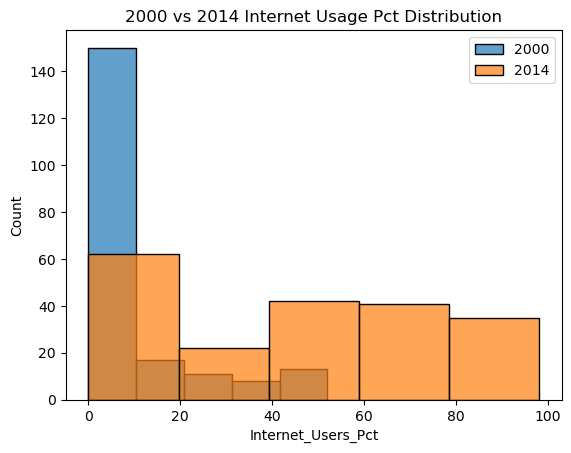

In [34]:
d_2000 = internet_df[internet_df["Year"]==2000]
d_2014 = internet_df[internet_df["Year"]==2014]

sns.histplot(d_2000["Internet_Users_Pct"], bins=5, label='2000', alpha=0.7)
sns.histplot(d_2014["Internet_Users_Pct"], bins=5, label='2014', alpha=0.7)

plt.title("2000 vs 2014 Internet Usage Pct Distribution")
plt.legend()
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

Answer: 16 Countries

In [35]:
year_2014 = internet_df[internet_df["Year"] == 2014]
below_5 = year_2014[year_2014["Internet_Users_Pct"] < 5]
print(len(below_5))

16


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [36]:
# print(internet_df.shape)
# print(gdp_df.shape) # should end up with 7662 rows

#left join on Country & Year
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=("Country","Year"), how="outer")

#Review
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())
print(gdp_and_internet_use.shape)

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2021     1517.016266                 NaN
1  Afghanistan  2020     1968.341002                 NaN
2  Afghanistan  2019     2079.921861                 NaN
3  Afghanistan  2018     2060.698973                 NaN
4  Afghanistan  2017     2096.093111                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8731   Yemen  1999             NaN            0.056629
8732   Yemen  1998             NaN            0.023323
8733   Yemen  1997             NaN            0.015025
8734   Yemen  1996             NaN            0.000621
8735   Yemen  1990             NaN            0.000000
(8736, 4)


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Answer: Iceland has a significantly lower GDP, but the highest internet user %. 

In [37]:
top_3 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014].sort_values("Internet_Users_Pct", ascending=False).iloc[0:3]
print(top_3)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30


C:\Users\Max-X1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


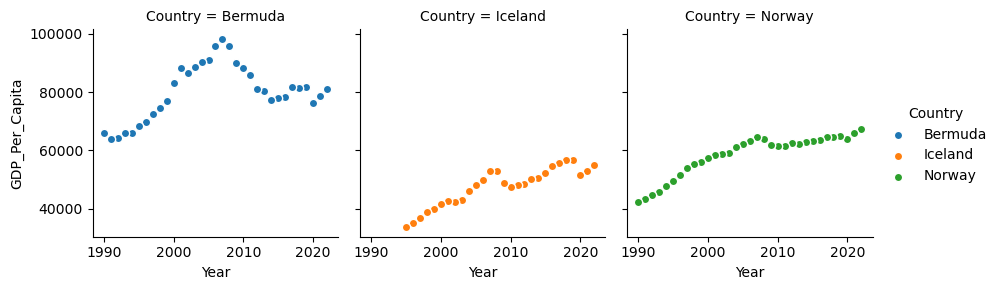

In [38]:
top_3_all = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Bermuda", "Norway"])]

graph = sns.FacetGrid(top_3_all, col="Country", hue ="Country") 

graph.map(plt.scatter, "Year", "GDP_Per_Capita", edgecolor ="w").add_legend()

plt.show() 


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [39]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
7                    Afghanistan  2014     2144.449634                6.39
28   Africa Eastern and Southern  2014     3642.875373                 NaN
61    Africa Western and Central  2014     4146.994622                 NaN
94                       Albania  2014    11586.817446               60.10
127                      Algeria  2014    11561.259795               18.09


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

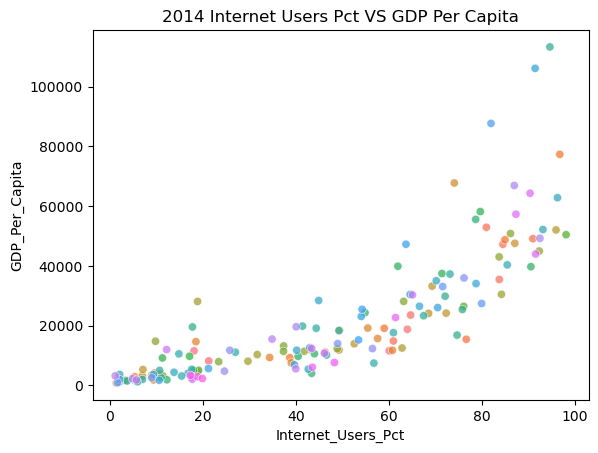

         Year  GDP_Per_Capita  Internet_Users_Pct
count   281.0      242.000000          202.000000
mean   2014.0    19604.864244           45.249851
std       0.0    21048.833638           29.573613
min    2014.0      765.259554            0.000000
25%    2014.0     4652.197561           17.517500
50%    2014.0    12164.228037           44.655000
75%    2014.0    26485.329288           69.945000
max    2014.0   151616.402364           98.160000


In [46]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Country", legend=False, alpha=0.75)
plt.title("2014 Internet Users Pct VS GDP Per Capita")
plt.show()

print(gdp_and_internet_use_2014.describe())

In [45]:
gdp_and_internet_use_2014.sort_values(["GDP_Per_Capita", "Internet_Users_Pct"], ascending=[False, False])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
4187,"Macao SAR, China",2014,151616.402364,NaN,High
4154,Luxembourg,2014,113313.578898,94.67,High
5752,Qatar,2014,106141.326189,91.49,High
6114,Singapore,2014,87702.521984,82.00,High
687,Bermuda,2014,77361.104881,96.80,High
...,...,...,...,...,...
8263,Lao P.D.R.,2014,NaN,14.26,NaN
7788,Central African Rep.,2014,NaN,4.03,NaN
7808,Congo (Democratic Republic of the),2014,NaN,3.00,NaN
7954,Eritrea,2014,NaN,0.99,NaN


24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [42]:
gdp_and_internet_use_2014["GDP_Group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])

gdp_and_internet_use_2014.head()

C:\Users\Max-X1\AppData\Local\Temp\ipykernel_10528\4143688702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["GDP_Group"] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3 , labels= ['Low', 'Medium', 'High'])


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium


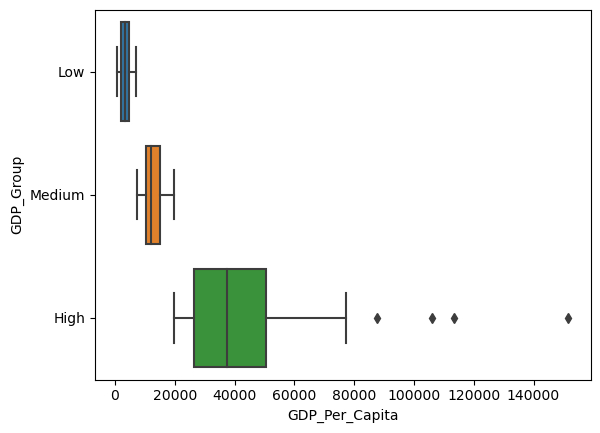

In [43]:
sns.boxplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="GDP_Group")
plt.show()

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

Answer: Internet users increase as GDP gets higher. 

In [44]:
median_internet = gdp_and_internet_use_2014.groupby("GDP_Group")["Internet_Users_Pct"].median()
print(median_internet)

GDP_Group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64


bonus:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [55]:
#gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=("Country","Year"), how="outer")
edu_df = pd.read_csv('../data/education_attendance.csv')
edu_df = edu_df.drop("Value Footnotes", axis=1) #didn't need footnotes
edu_df = edu_df.drop("Source", axis=1) #didn't need source info

edu_df = edu_df.rename(columns={"Country or Area":"Country", "Value":"Attendance_Perc"})

print(edu_df.head())
print(edu_df.tail())

edu_df.info()

       Country     Subgroup       Year     Unit  Attendance_Perc
0  Afghanistan        Total  2005-2011  Percent              1.0
1  Afghanistan       Female  2005-2011  Percent              1.0
2  Afghanistan         Male  2005-2011  Percent              1.0
3  Afghanistan  Poorest 20%  2005-2011  Percent              0.0
4  Afghanistan  Richest 20%  2005-2011  Percent              4.0
     Country                                           Subgroup Year Unit  \
274  fnSeqID                                           Footnote  NaN  NaN   
275        1  Data refer to the most recent year available d...  NaN  NaN   
276        2  Data refer to the most recent year available d...  NaN  NaN   
277        3  Data refer to the most recent year available d...  NaN  NaN   
278        4  Data refer to the most recent year available d...  NaN  NaN   

     Attendance_Perc  
274              NaN  
275              NaN  
276              NaN  
277              NaN  
278              NaN  
<class 'p